### Exponential Curve Fitting

To fit an arbitrary exponential curve we must first define it as a function. Then we may invoke scipy.optimize.curve_fit to tweak the arguments (using arguments we provide as the starting parameters) to best fit the data. In this example we will use a single exponential decay function. Function is: `a*np.exp(-b*x) + c`

Biexponential functions are often used to separate fast and slow components of exponential decay which may be caused by different mechanisms and occur at different rates. In this example we will fit the data to a method with a MONO exponential component 

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#### Define reusable functions (for curve fitting and evaluation)

In [2]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

def fit_quality(x, y, a, b, c):
    squaredDiffs = np.square(y - func(x, a, b, c))
    squaredDiffsFromMean = np.square(y - np.mean(y))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    return rSquared

def inspect_parameters(popt, pcov):
    a, b, c = popt
    sampleRate = a # Hz
    tauSec = (1 / c) / sampleRate

    # inspect the parameters
    print(f"Y = {a} * e^(-{b} * x) + {c}")
    print(f"Sample rate={a} Hz")
    print(f"Tau = {tauSec * 1e6} µs")
    
    stdevs = np.sqrt(np.diag(pcov))
    print('Std Dev:',stdevs)

#### Generate data for curve fitting

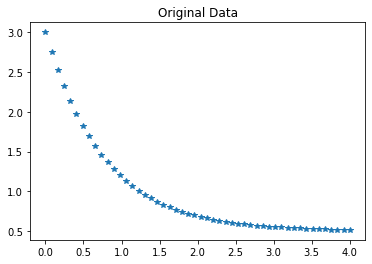

In [3]:
#create a dummy dataset
x = np.linspace(0,4,50); #print(x)
#create the 'ideal' negative exponential curve, using the function
y = func(x, 2.5, 1.3, 0.5); #print(y)
#the dummy data, with some noise thrown in
yn = y + 0.2*np.random.normal(size=len(x)); #print(yn)
plt.plot(x, y, '*')
plt.title("Original Data"); plt.show()

#### Curve Fitting for various levels of NOISE

3
9


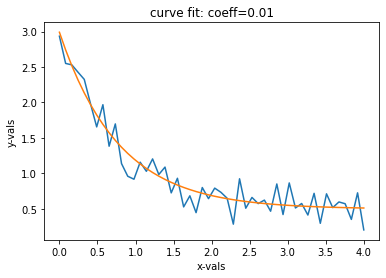

R² = 0.9999812260893491
Y = 2.495473560826679 * e^(-1.2879019632736846 * x) + 0.495577925950729
Sample rate=2.495473560826679 Hz
Tau = 808602.4879964901 µs
Std Dev: [0.00658316 0.00742398 0.00294905]
Average Residue: 0.0010505143335162127
*****************************************

3
9


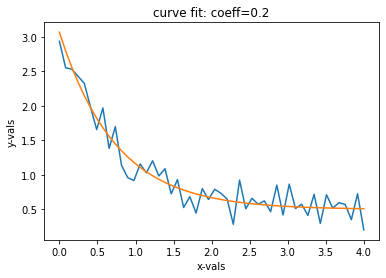

R² = 0.9990980218081412
Y = 2.568709531082166 * e^(-1.3544946360214154 * x) + 0.4968725311880199
Sample rate=2.568709531082166 Hz
Tau = 783501.8291887224 µs
Std Dev: [0.11237409 0.12609552 0.0472881 ]
Average Residue: 0.008422337067651393
*****************************************

3
9


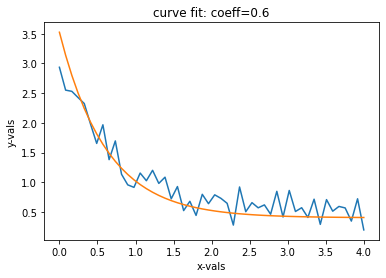

R² = 0.9325577375664377
Y = 3.1193404188391933 * e^(-1.6199024876011727 * x) + 0.40472156373254947
Sample rate=3.1193404188391933 Hz
Tau = 792101.5862011741 µs
Std Dev: [0.457925   0.46833004 0.15784917]
Average Residue: 0.08642660764726012
*****************************************

3
9


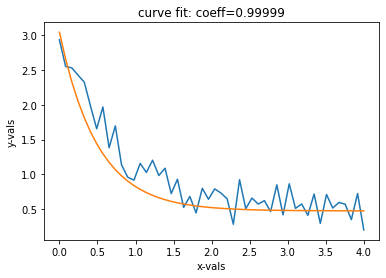

R² = 0.8834962044184643
Y = 2.5690144856548156 * e^(-1.9945801807087364 * x) + 0.47405589538617426
Sample rate=2.5690144856548156 Hz
Tau = 821114.8283818475 µs
Std Dev: [0.66674243 0.95997239 0.19021983]
Average Residue: 0.17822957351398291
*****************************************



In [4]:
# Using the python scipy function curve_fit with function and input variables
# popt, pcov = curve_fit(func, x, yn)
for coeff in [0.01,0.2,0.6, 0.99999]:
    popt, pcov = curve_fit(func, x, y + coeff*np.random.normal(size=len(x)))
    print(popt.size)
    print(pcov.size)
    f1=plt.plot(x,yn,x, func(x,popt[0],popt[1],popt[2]))
    plt.title('curve fit: coeff='+str(coeff))
    plt.xlabel('x-vals')
    plt.ylabel('y-vals')
    plt.show()
    
    print('R² = {}'.format(fit_quality(x,y,popt[0],popt[1],popt[2])))
    inspect_parameters(popt,pcov)
    
    res = y - func(x, *popt)#; print('Residue:', res)
    print('Average Residue:',(y - func(x, *popt)).sum()/len(x))

    print('*****************************************\n')

### Extrapolating Fitted Curve

Calculated parameters may be used to extend this curve to any position by passing X values of interest into the function we used during the fit. The value at time 0 is simply `a + c` because the exponential component becomes `e^(0)` which is 1.

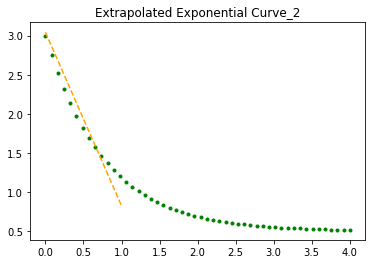

No. of data points during fitting is 50 and extrapolation is 2
R² = 0.8834962044184643
*****************************************



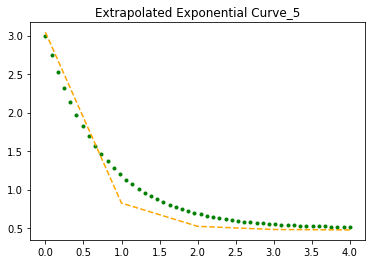

No. of data points during fitting is 50 and extrapolation is 5
R² = 0.8834962044184643
*****************************************



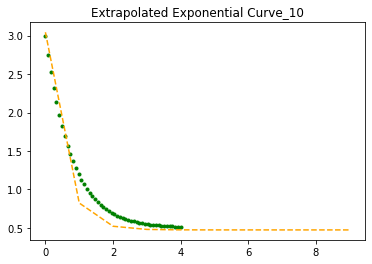

No. of data points during fitting is 50 and extrapolation is 10
R² = 0.8834962044184643
*****************************************



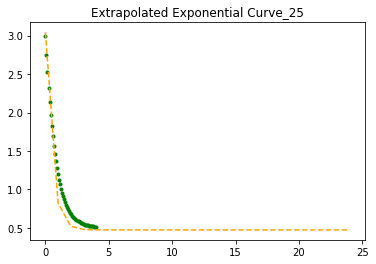

No. of data points during fitting is 50 and extrapolation is 25
R² = 0.8834962044184643
*****************************************



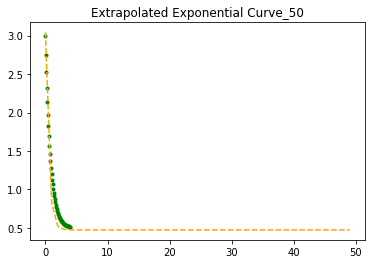

No. of data points during fitting is 50 and extrapolation is 50
R² = 0.8834962044184643
*****************************************



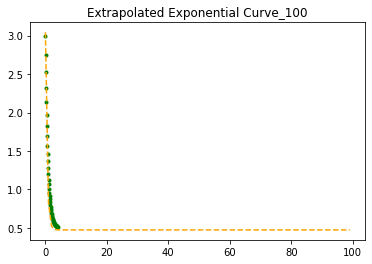

No. of data points during fitting is 50 and extrapolation is 100
R² = 0.8834962044184643
*****************************************



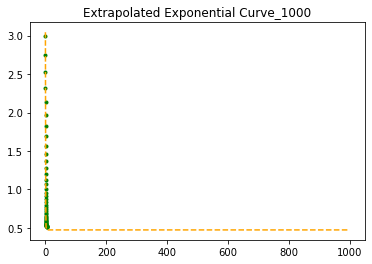

No. of data points during fitting is 50 and extrapolation is 1000
R² = 0.8834962044184643
*****************************************



In [5]:
for extrapoln_count in [2,5,10,25,50,100,1000]:

    x_new = np.arange(extrapoln_count)
    y_new = func(x_new, *popt)
#     y_new = func(x_new, a, b, c)

    plt.plot(x, y, '.', label="data",c='g')
    plt.plot(x_new, y_new, '--', label="fitted",c='orange')
    plt.title("Extrapolated Exponential Curve_{}".format(extrapoln_count))
    plt.show()
    
    print('No. of data points during fitting is {f} and extrapolation is {e}'.format(f=len(x),e=len(x_new)))
    print('R² = {}'.format(fit_quality(x,y,*popt)))
    
    print('*****************************************\n')

### Constraining the Infinite Decay Value (to Zero)

Y = 2.5766824210157733 * e^(-0.6222703401087992 * x)
Tau = 80.35092913356257 µs


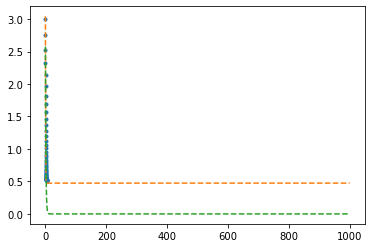

In [6]:
def funcZeroC(x, a, b):
    return a * np.exp(-b * x)

# perform the fit using the function where B is 0
p0 = (2000, .1) # start with values near those we expect
params_new, cv = curve_fit(funcZeroC, x, y, p0)
a_new, b_new = params_new
sampleRate = 20_000 # Hz
tauSec = (1 / b_new) / sampleRate

# inspect the results
print(f"Y = {a_new} * e^(-{b_new} * x)")
print(f"Tau = {tauSec * 1e6} µs")

# compare this curve to the original
y_new_compare = funcZeroC(x_new, a_new, b_new)
plt.plot(x, y, '.', label="data")
plt.plot(x_new, y_new, '--', label="fitted")
plt.plot(x_new, y_new_compare, '--', label="zero_new")

#### Reference

https://swharden.com/blog/2020-09-24-python-exponential-fit/

https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509